# Environment Settup

In [16]:
! pip install yfinance
! pip install plotly

In [17]:
import pandas as pd
import yfinance as yf
from tqdm import tqdm
import numpy as np
import seaborn as sns
from scipy.optimize import minimize
from scipy.optimize import root
from numpy.core.function_base import linspace
from scipy.stats import skew, kurtosis
import plotly.express as px
import numpy as np

In [3]:
# Matplotlib Darkmode (optional)

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cycler

colors = cycler('color',
                ['#2a7beb', '#1cbf68', '#7669d1',
                 '#edc22d', '#ee3f3f', '#55defd',
                 '#fafdc6'])
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rc('figure', facecolor='#313233')

# Multi-Asset Portfolio

## Individual performance 

[*********************100%***********************]  4 of 4 completed
Asset's Statitistic Description


AMZN        KO      TSLA     ^GSPC
count  1890.000  1890.000  1890.000  1890.000
mean      0.364     0.120     0.470     0.136
std       0.309     0.142     0.508     0.143
min      -0.127    -0.060    -0.193    -0.067
25%      -0.008    -0.004    -0.014    -0.003
50%       0.001     0.000     0.001     0.001
75%       0.012     0.005     0.018     0.005
max       0.157     0.057     0.244     0.047

Asset's Correlation Table


[]

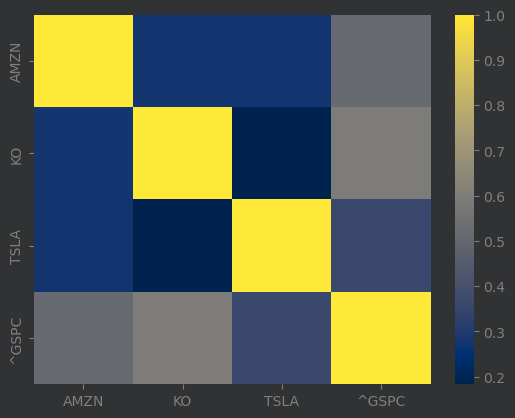

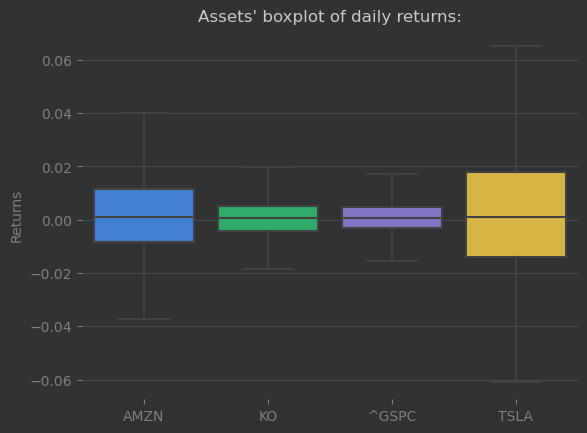

In [4]:
# Assets of the portfolio
assets = ['AMZN','KO','^GSPC','TSLA']

# Download of the market data for every asset
f = yf.download(assets, start = "2007-01-01", end = "2018-01-01")["Adj Close"].pct_change(1).dropna()

# Assets' data description
description = np.round(np.transpose([[1,252,np.sqrt(252),1,1,1,1,1]])*f.describe(),3)
print("Asset's Statitistic Description")
display(description)

# Assets' correletion
correlation = f.corr()
print("Asset's Correlation Table")
sns.heatmap(correlation, cmap="cividis")

# Assets' Boxplot
plt.figure()
box_plot_data = f[assets]
box_plot_data.columns = assets
sns.boxplot(data=box_plot_data,showfliers = False).set(title="Assets' boxplot of daily returns:", ylabel="Returns")
plt.plot()

## Equally weighted performance (EW)

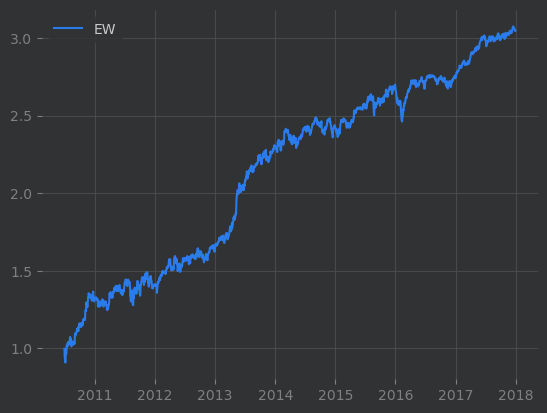

In [5]:
# Number of assets in the portfolio
n=len(f.transpose())

# Attribution of equal weights in EW portfolio
x0 = np.zeros(n)+(1/n)
ew_weights = np.round(x0,3)


# Creation of the portfolio 
sample_EW = np.multiply(ew_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.legend(['EW'])
plt.show()

# Single Criterion Optimization (Simple non-linear problem solving)

## Excess Return optimization 

100%|██████████| 100000/100000 [00:32<00:00, 3085.32it/s]


-0.0018188418938041777
45587
[0.057 0.001 0.925 0.017]


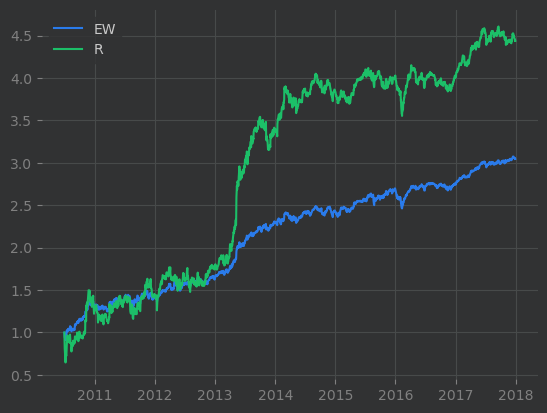

In [6]:
# Optimized return function 
def return_criterion(weight, returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    criterion = -mu
    return criterion 

# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(100000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(return_criterion(weights,f.dropna()))


# Faire un mapping criterion et returns 
print(min(b))
print(b.index(min(b)))


# Result
r_weights = a[b.index(min(b))]
print(r_weights)


# Creation of the portfolio 
sample_r = np.multiply(r_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.legend(['EW','R'])
plt.show()


## Variance optimization 

100%|██████████| 100000/100000 [00:34<00:00, 2916.42it/s]


0.008015191082941107
32851
[0.    0.553 0.004 0.442]


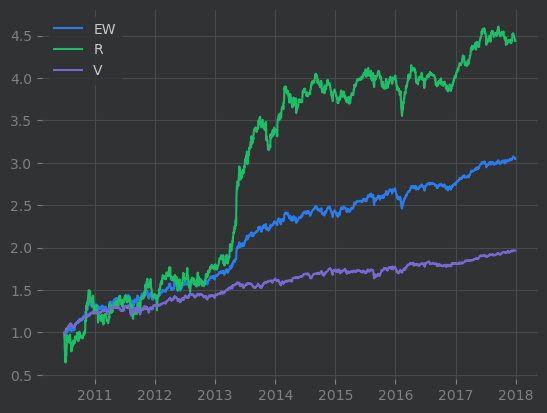

In [7]:
def volatility_criterion(weight, returns):
    pf_return = returns.values.dot(weight)
    sigma = np.std(pf_return)
    criterion = sigma
    return criterion

# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(100000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(volatility_criterion(weights,f.dropna()))


# Faire un mapping criterion et returns 
print(min(b))
print(b.index(min(b)))


# Result
v_weights = a[b.index(min(b))]
print(v_weights)


# Creation of the portfolio 
sample_v = np.multiply(v_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.legend(['EW','R','V'])
plt.show()

## Skewness optimization 

100%|██████████| 100000/100000 [01:02<00:00, 1610.87it/s]


-0.5919669522490687
51805
[0.972 0.011 0.005 0.012]


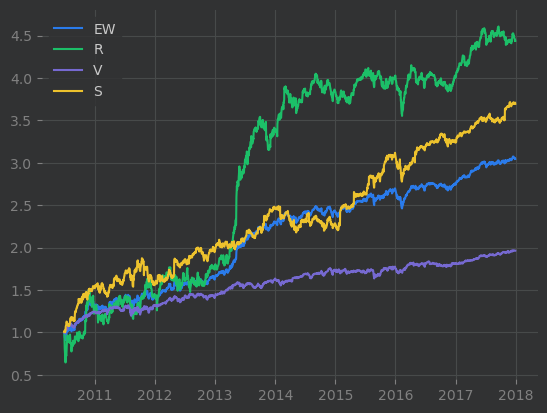

In [8]:
def skeweness_criterion(weight,returns):
  pf_return = returns.values.dot(weight)
  skew_ret=skew(pf_return,0)
  criterion = -skew_ret
  return criterion 
  
  
# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(100000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(skeweness_criterion(weights,f.dropna()))


# Faire un mapping criterion et returns 
print(min(b))
print(b.index(min(b)))


# Result
s_weights = a[b.index(min(b))]
print(s_weights)


# Creation of the portfolio 
sample_s = np.multiply(s_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.legend(['EW','R','V','S'])
plt.show()


## Kurtosis optimization 

100%|██████████| 100000/100000 [01:06<00:00, 1495.08it/s]


1.6319774004849803
24338
[0.225 0.598 0.173 0.005]


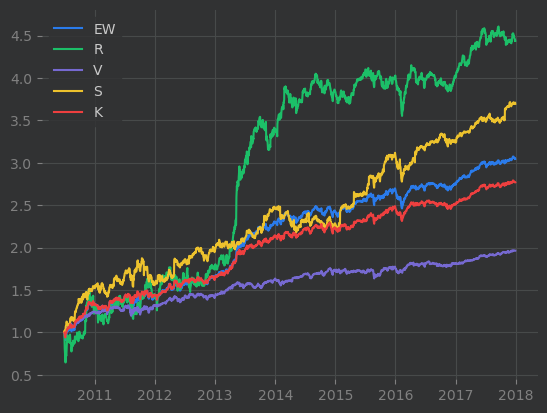

In [13]:
def kurtosis_criterion(weight,returns):
  pf_return = returns.values.dot(weight)
  kurt_ret=kurtosis(pf_return,0)
  criterion = kurt_ret
  return criterion 
  
  
# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(100000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(kurtosis_criterion(weights,f.dropna()))


# Faire un mapping criterion et returns 
print(min(b))
print(b.index(min(b)))


# Result
k_weights = a[b.index(min(b))]
print(k_weights)

# Creation of the portfolio 
sample_k = np.multiply(k_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.legend(['EW','R','V','S','K'])
plt.show()

# Multi-criterion Optimization 

## Non-normalized criterion approach 

100%|██████████| 100000/100000 [01:40<00:00, 999.82it/s]


1.6670514329163748
63628
[0.257 0.546 0.183 0.014]


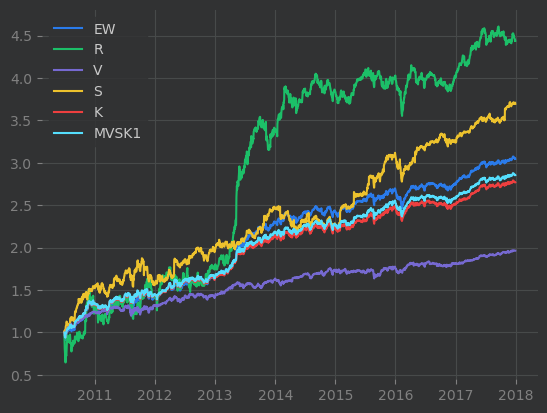

In [14]:
def mvsk_criterion_1(weight,returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    sigma = np.std(pf_return)
    skew_ret=skew(pf_return,0)
    kurt_ret=kurtosis(pf_return,0)
    # Linear criterion attribution 
    criterion = kurt_ret + sigma- skew_ret - mu
    return criterion 


# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(100000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(mvsk_criterion_1(weights,f.dropna()))


# Faire un mapping criterion et returns 
print(min(b))
print(b.index(min(b)))


# Result
mvsk1_weights = a[b.index(min(b))]
print(mvsk1_weights)


# Creation of the portfolio 
sample_mvsk1 = np.multiply(mvsk1_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.plot(sample_mvsk1.cumsum()+1)
plt.legend(['EW','R','V','S','K','MVSK1'])
plt.show()

Here we clearly see the quasi-perfect match between Kurtosis and Mean-Variance-Skewness-Kurtosis in terms of performance and then in weights. that is explained by the over-weighting of he kurtosis score in a non-normalized multi-criterion optimization. The convex optimization will automatically find a local minimum driven only by the kurtosis criterion. We must then introduced an normalized objective fonction in this optimization problem. 

## Normalized criterion approach 

100%|██████████| 10000/10000 [00:03<00:00, 2834.59it/s]


[0.187 0.006 0.789 0.019]
Weights Mean Opt: [0.187 0.006 0.789 0.019]
Performance Mean Opt: 0.44261165867949825


100%|██████████| 10000/10000 [00:03<00:00, 2702.88it/s]


[0.01  0.519 0.002 0.469]
Weights Variance Opt: [0.01  0.519 0.002 0.469]
Performance Variance Opt: 0.13081139073860115


100%|██████████| 10000/10000 [00:06<00:00, 1483.76it/s]


[0.936 0.024 0.012 0.028]
Weights Skewness Opt: [0.936 0.024 0.012 0.028]
Performance Skewness Opt: 0.35339190733825887


100%|██████████| 10000/10000 [00:06<00:00, 1487.34it/s]


[0.22  0.604 0.161 0.015]
Weights Kurtosis Opt: [0.22  0.604 0.161 0.015]
Performance Kurtosis Opt: 0.23062614690277516


100%|██████████| 100000/100000 [01:39<00:00, 1002.75it/s]


7.248954907436113
29662
[0.263 0.547 0.183 0.007]


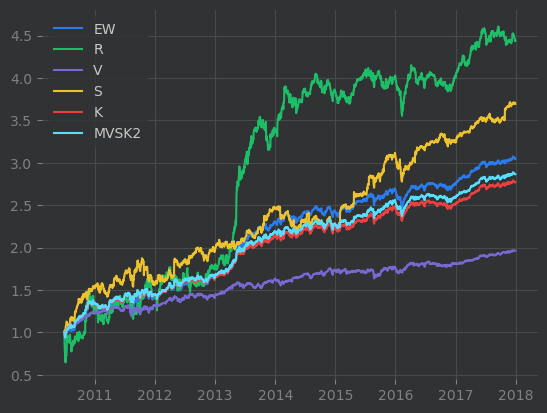

In [15]:

### __________________ Two - Step Progamming Optimization __________________



## The first step consists in finding invidual criterion optimal scores 

# Mean Optimization ______________________________________________________________________________________________________

# Optimization problem solving
# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(10000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(return_criterion(weights,f.dropna()))

# Result
r_weights = a[b.index(min(b))]
print(r_weights)

# Creation of the portfolio 
opt_mu = np.sum(np.multiply(r_weights,f.dropna()), axis = 1).mean()*252

print("Weights Mean Opt: " + str(r_weights))
print("Performance Mean Opt: " + str(opt_mu))



# Variance Optimization ______________________________________________________________________________________________________

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(10000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(volatility_criterion(weights,f.dropna()))


# Result
v_weights = a[b.index(min(b))]
print(v_weights)

# Creation of the portfolio 
opt_sigma = np.sum(np.multiply(v_weights,f.dropna()), axis = 1).mean()*252

print("Weights Variance Opt: " + str(v_weights))
print("Performance Variance Opt: " + str(opt_sigma))



# Skewness Optimization ______________________________________________________________________________________________________

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(10000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(skeweness_criterion(weights,f.dropna()))

# Result
s_weights = a[b.index(min(b))]
print(s_weights)

# Creation of the portfolio 
opt_skew = np.sum(np.multiply(s_weights,f.dropna()), axis = 1).mean()*252

print("Weights Skewness Opt: " + str(s_weights))
print("Performance Skewness Opt: " + str(opt_skew))



# Kurtosis Optimization ______________________________________________________________________________________________________

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(10000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(kurtosis_criterion(weights,f.dropna()))

# Result
k_weights = a[b.index(min(b))]
print(k_weights)

# Creation of the portfolio 
opt_kurt = np.sum(np.multiply(k_weights,f.dropna()), axis = 1).mean()*252

print("Weights Kurtosis Opt: " + str(k_weights))
print("Performance Kurtosis Opt: " + str(opt_kurt))











# The second step consists in resolving the final optimization problem with previously found individuals optimal criterions 


def mvsk_criterion_2(weight,returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    sigma = np.std(pf_return)
    skewness=skew(pf_return,0)
    kurt=kurtosis(pf_return,0)
    # Linear criterion attribution 
    criterion = abs(kurt/opt_kurt) + abs(sigma/opt_sigma) + abs(skewness/opt_skew) + abs(mu/opt_mu)
    return criterion 


# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(100000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(mvsk_criterion_2(weights,f.dropna()))


# Faire un mapping criterion et returns 
print(min(b))
print(b.index(min(b)))


# Result
mvsk2_weights = a[b.index(min(b))]
print(mvsk2_weights)

# Creation of the portfolio 
sample_mvsk2 = np.multiply(mvsk2_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.plot(sample_mvsk2.cumsum()+1)
plt.legend(['EW','R','V','S','K','MVSK2'])
plt.show()

## Normalized criterion with investor preference approach 

100%|██████████| 100000/100000 [01:31<00:00, 1088.08it/s]


-5.953520849495988
24197
[0.885 0.087 0.008 0.02 ]


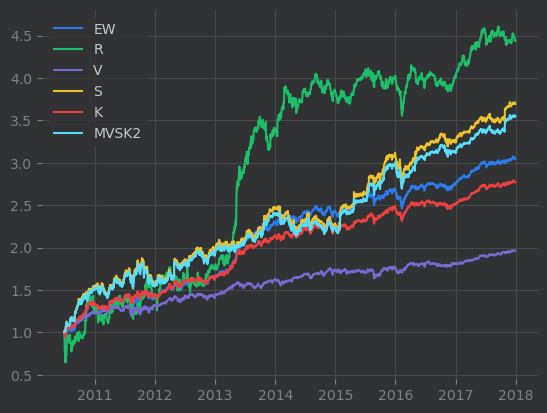

In [30]:
def mvsk_criterion_2(weight,returns):
    pf_return = returns.values.dot(weight)
    mu = np.mean(pf_return)
    sigma = np.std(pf_return)
    skewness=skew(pf_return,0)
    kurt=kurtosis(pf_return,0)
    # Linear criterion attribution 
    criterion = abs(kurt/opt_kurt)**0 + abs(sigma/opt_sigma)**0 + abs(skewness/opt_skew)**3 + abs(mu/opt_mu)**3
    return -criterion 


# Number of assets
n=len(f.transpose())

# Initialisation weight value
x0 = np.zeros(n)+(1/n)

# Monte-Carlo Optimization 
a,b = [], []
for i in tqdm(range(100000)):
    weights=np.random.uniform(0,1,n)
    weights=np.round(weights/np.sum(weights),3)
    a.append(weights)
    b.append(mvsk_criterion_2(weights,f.dropna()))


# Faire un mapping criterion et returns 
print(min(b))
print(b.index(min(b)))



# Result
mvsk2_weights = a[b.index(min(b))]
print(mvsk2_weights)

# Creation of the portfolio 
sample_mvsk2 = np.multiply(mvsk2_weights,f.dropna()).sum(axis = 1)

# Ploting the performance of EW portfolio
plt.figure()
plt.plot(sample_EW.cumsum()+1)
plt.plot(sample_r.cumsum()+1)
plt.plot(sample_v.cumsum()+1)
plt.plot(sample_s.cumsum()+1)
plt.plot(sample_k.cumsum()+1)
plt.plot(sample_mvsk2.cumsum()+1)
plt.legend(['EW','R','V','S','K','MVSK2'])
plt.show()

# Weights Data Visualization 

In [31]:
# Use of plotly template to produce the 3d chart 

x = []
y = []
z = []
for i in tqdm(range(100000)):
    x.append(a[i][0])
    y.append(a[i][1])
    z.append(a[i][2])

data = {'x': x, 'y': y, 'z': z}
df = pd.DataFrame(data)


fig = px.scatter_3d(df, x='x', y='y', z='z', color='z')


fig.update_layout(scene=dict(
    xaxis_title='X Label',
    yaxis_title='Y Label',
    zaxis_title='Z Label'
))
fig.update_layout(title='3D Scatter Plot',autosize=False,width=2000,height=2000)
fig.update_traces(marker=dict(size=1),marker_color=b)

fig.show()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:00<00:00, 1409418.97it/s]
